In [1]:
unaccepted_cases = '{}/{}'.format(base_path,'1_timingDistributionOfBigHints/part-00000-cc3a6cbd-8cba-477b-a61a-1dbb0099dabe-c000.csv')
pos_accepted_cases = '{}/{}'.format(base_path,'AcceptedCases/singleOutput/allPositive/part-00000-4259c50f-1754-4c60-b27f-8cabb6220d52-c000.csv')
neg_accepted_cases= '{}/{}'.format(base_path,'AcceptedCases/singleOutput/allNegative/part-00000-8403ccf6-a50b-486d-ae03-2a05f087e604-c000.csv')

In [32]:
import pandas as pd
ua_cases_df = pd.read_csv(unaccepted_cases)
ua_cases_df.head()
#ua_cases_df['hour'].sum()

,_id,hour,week_day
0,05O55G5455QNL4JTP4J055PQ,21,Wed
1,05O55G5455QNO4OTP4T055PQ,5,Sun
2,05O55G5455QOG40TP4T055P5,6,Tue
3,05O55G5455QOL4QTP44055P4,5,Sat
4,05O55G5455QOQ4LTP45055PG,4,Mon


In [34]:
a_pos_df = pd.read_csv(pos_accepted_cases)
a_pos_df.head()

,_id,hour,week_day
0,040NNN4O55T5TTQTP40O5TPL,2,Thu
1,040NNN4O55T5TTQTP40O5TPL,4,Sat
2,040T0J5J5QJ0TTJTP4045TPN,3,Thu
3,04JG4JO45N5JTOQTP4JT5TPQ,7,Wed
4,04JG4JO45N5JTOQTP4JT5TPQ,3,Thu


In [35]:
a_neg_df = pd.read_csv(neg_accepted_cases)
a_neg_df.head()

,_id,hour,week_day
0,040Q0TG55GOTT5JTP4GO5TPT,5,Tue
1,05G4JQGO50TGTT4TP4O4TTPG,22,Tue
2,05G4JQGO50TGTT4TP4O4TTPG,1,Mon
3,05NOG0J454G444LTP44N5TPJ,22,Sat
4,05O5505455Q0O4NTP4Q055P4,23,Sun


In [43]:
ua_df = ua_cases_df[['_id','hour']]
ua_hour_count_df = ua_df.groupby('hour').size().reset_index(name='ua_count')
ua_hour_count_df.head()
#ua_hour_count_df['ua_count'].sum()

,hour,ua_count
0,0,279285
1,1,293157
2,2,324724
3,3,348084
4,4,325444


In [36]:
a_pos_df =a_pos_df[['_id','hour']]
a_pos_hour_count_df = a_pos_df.groupby('hour').size().reset_index(name='a_pos_count')
a_pos_hour_count_df.head()

,hour,a_pos_count
0,0,215
1,1,218
2,2,263
3,3,322
4,4,273


In [37]:
a_neg_df =a_neg_df[['_id','hour']]
a_neg_hour_count_df = a_neg_df.groupby('hour').size().reset_index(name='a_neg_count')
a_neg_hour_count_df.head()

,hour,a_neg_count
0,0,100
1,1,122
2,2,118
3,3,139
4,4,117


In [44]:
result_df = pd.concat([ua_hour_count_df,a_pos_hour_count_df,a_neg_hour_count_df], axis=1)
result_df = result_df[['hour','a_pos_count','a_neg_count','ua_count']]
result_df=result_df.T.drop_duplicates().T
result_df.head()

,hour,a_pos_count,a_neg_count,ua_count
0,0,215,100,279285
1,1,218,122,293157
2,2,263,118,324724
3,3,322,139,348084
4,4,273,117,325444


In [46]:
result_df['sum'] = result_df[['a_pos_count','a_neg_count','ua_count']].sum(axis=1)
#result_df.head()
result_df.head()

,hour,a_pos_count,a_neg_count,ua_count,sum
0,0,215,100,279285,279600
1,1,218,122,293157,293497
2,2,263,118,324724,325105
3,3,322,139,348084,348545
4,4,273,117,325444,325834


In [47]:
result_df['a_pos_perc']= round(result_df['a_pos_count']/result_df['sum'] * 100,4)
result_df['a_neg_perc']= round(result_df['a_neg_count']/result_df['sum'] * 100,4)
result_df['ua_perc']= round(result_df['ua_count']/result_df['sum'] * 100,4)

result_df= result_df[['hour','a_neg_perc','a_pos_perc','ua_perc']]
result_df.head()

,hour,a_neg_perc,a_pos_perc,ua_perc
0,0,0.0358,0.0769,99.8873
1,1,0.0416,0.0743,99.8842
2,2,0.0363,0.0809,99.8828
3,3,0.0399,0.0924,99.8677
4,4,0.0359,0.0838,99.8803


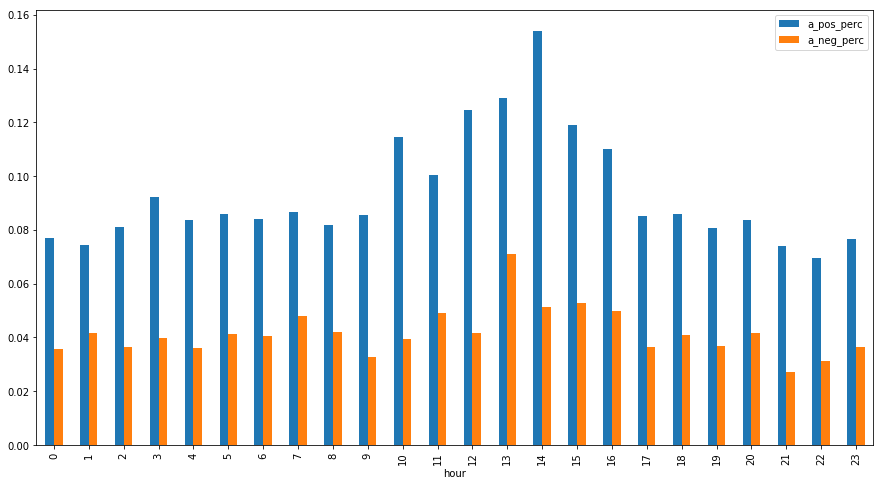

In [53]:
from matplotlib import pyplot as plt
ax = plt.gca()
result_df.plot(x="hour", y=['a_pos_perc','a_neg_perc'], kind="bar",ax=ax,figsize=(15,8))
#plt.rcParams["figure.figsize"] = (15,8)
plt.show()

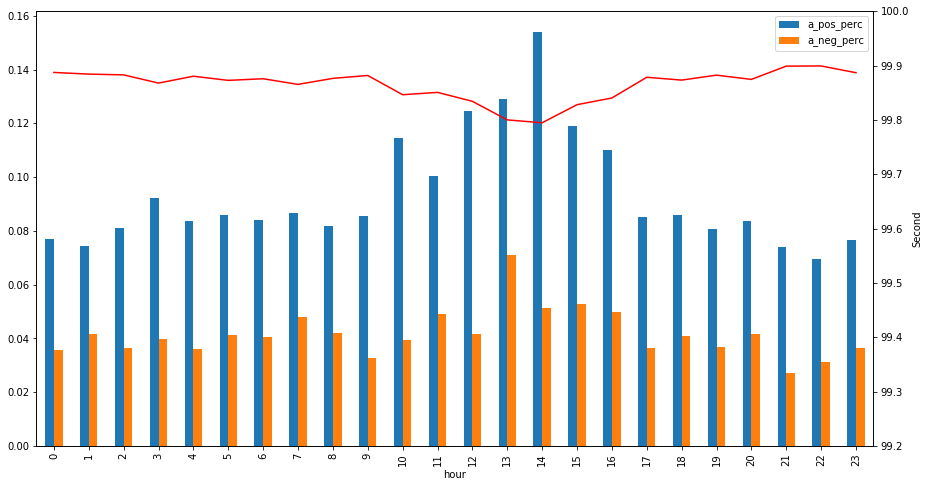

In [97]:
from numpy import array

ax1 = plt.gca()
ind = result_df['ua_perc']
ind_arr =  array(ind)
ind = np.arange(len(ind)) 
ax1.set_xticks(ind)
result_df.plot(x="hour", y=['a_pos_perc','a_neg_perc'], kind="bar",ax=ax1,figsize=(15,8))
ax2 = ax1.twinx()
ax2.plot(ind, ind_arr, 'r-')
ax2.set_ylabel('Second')
ax2.set_ylim((99.2,100.0))
plt.show()

In [83]:
import numpy as np
men_means, men_std = (20, 35, 30, 35, 27), (2, 3, 4, 1, 2)
ind = np.arange(len(men_means))  # the x locations for the groups
ind

array([0, 1, 2, 3, 4])

In [62]:
result_df['ua_perc']

0     99.8873
1     99.8842
2     99.8828
3     99.8677
4     99.8803
5     99.8727
6     99.8757
7     99.8653
8     99.8764
9     99.8817
10    99.8463
11    99.8506
12    99.8342
13    99.8000
14    99.7947
15    99.8280
16    99.8403
17    99.8784
18    99.8732
19    99.8823
20    99.8745
21    99.8989
22    99.8992
23    99.8868
Name: ua_perc, dtype: float64

In [90]:
from numpy import array
ind = result_df['ua_perc']
ind
ind_arr =  array(ind)
type(ind_arr)
ind_arr
ind = np.arange(len(ind)) 
ind

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])